In [40]:
#import the required libraraies
import os
import warnings
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pylab as plt

%matplotlib inline

#### Explore data

In [5]:
train_data = pd.read_csv('data/train.csv')
print("----Original Data----")
train_data.head(5)

----Original Data----


,source_node,destination_node
0,1,690569
1,1,315892
2,1,189226
3,2,834328
4,2,1615927


In [9]:
#read graph data using built-in python network x module

if os.path.isfile('data/new_train.csv'):
    graph = nx.read_edgelist('data/new_train.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(graph))
else:
    train_data = pd.read_csv('data/train.csv')
    print(train_data[train_data.isna().any(axis=1)])
    print(train_data.info())
    print("Total duplicate entries in data: ",sum(train_data.duplicated()))
    train_data.to_csv('data/new_train.csv',header=False,index=False)
    graph = nx.read_edgelist('data/new_train.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(graph))

Empty DataFrame
Columns: [source_node, destination_node]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9437519 entries, 0 to 9437518
Data columns (total 2 columns):
 #   Column            Dtype
---  ------            -----
 0   source_node       int64
 1   destination_node  int64
dtypes: int64(2)
memory usage: 144.0 MB
None
Total duplicate entries in data:  0
DiGraph with 1862220 nodes and 9437519 edges


##### Display a sample of data as graph

DiGraph with 102 nodes and 80 edges


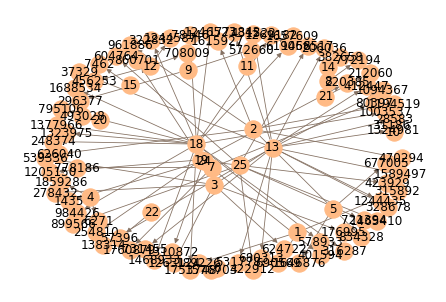

In [18]:
if not os.path.isfile('data/new_train_sample.csv'):
    pd.read_csv('data/train.csv', nrows=80).to_csv('data/new_train_sample.csv',header=False,index=False)
    
sub_graph=nx.read_edgelist('data/new_train_sample.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)

pos=nx.spring_layout(sub_graph)
nx.draw(sub_graph,pos,node_color='#ffba85',edge_color='#857162',width=0.8,edge_cmap=plt.cm.Oranges,with_labels=True)
plt.savefig("graph_sample.jpg")
print(nx.info(sub_graph))

#### Total number of followers of each individual person

Total individuals in data 1862220


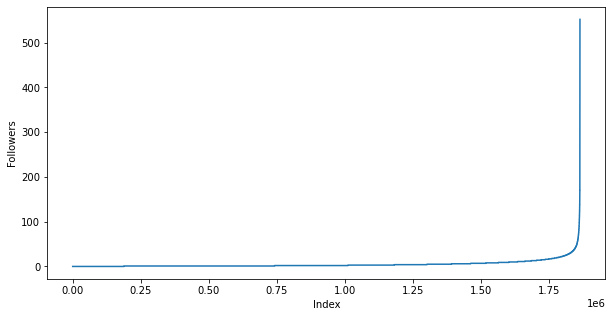

In [21]:
print("Total individuals in data",len(graph.nodes()))
person_indegree = list(dict(graph.in_degree()).values())
person_indegree.sort()
plt.figure(figsize=(10,5))
plt.plot(person_indegree)
plt.xlabel('Index')
plt.ylabel('Followers')
plt.show()

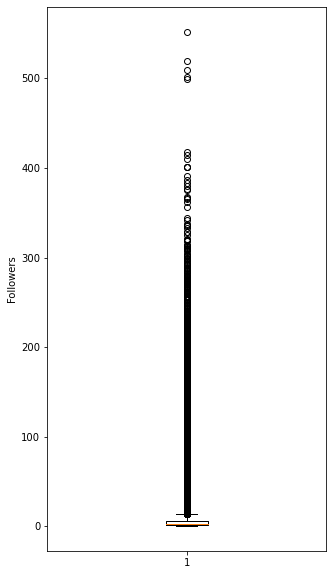

In [23]:
plt.figure(figsize=(5,10))
plt.boxplot(person_indegree)
plt.ylabel('Followers')
plt.show()

In [28]:
#analysing the percentile values to get a fair number of followers 
#80-100 percentile
for i in range(0,21):
    print(80+i,'percentile value: ',np.percentile(person_indegree,80+i))

80 percentile value:  7.0
81 percentile value:  7.0
82 percentile value:  8.0
83 percentile value:  8.0
84 percentile value:  9.0
85 percentile value:  9.0
86 percentile value:  10.0
87 percentile value:  10.0
88 percentile value:  11.0
89 percentile value:  11.0
90 percentile value:  12.0
91 percentile value:  13.0
92 percentile value:  14.0
93 percentile value:  15.0
94 percentile value:  17.0
95 percentile value:  19.0
96 percentile value:  21.0
97 percentile value:  24.0
98 percentile value:  29.0
99 percentile value:  40.0
100 percentile value:  552.0


In [30]:
#since above statiscs show that at 99% 40 follwers are there so we analyse 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value: ',np.percentile(person_indegree,99+(i/100)))

99.1 percentile value:  42.0
99.2 percentile value:  44.0
99.3 percentile value:  47.0
99.4 percentile value:  50.0
99.5 percentile value:  55.0
99.6 percentile value:  61.0
99.7 percentile value:  70.0
99.8 percentile value:  84.0
99.9 percentile value:  112.0
100.0 percentile value:  552.0


Text(0.5, 0, 'PDF of Indegree')

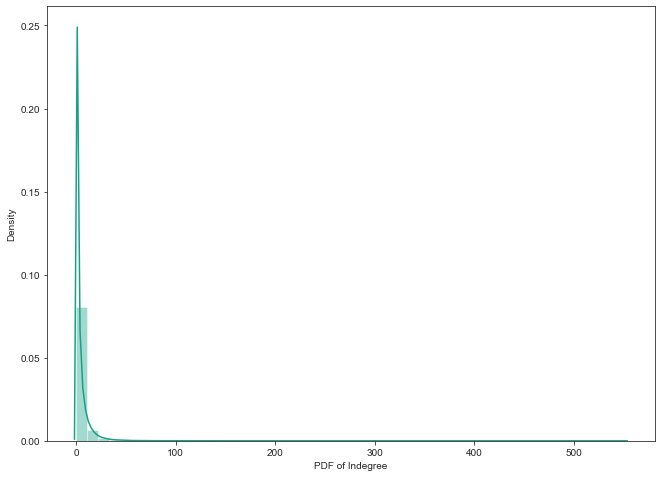

In [45]:
warnings.filterwarnings("ignore")
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10.9, 7.99)
sns.distplot(person_indegree, color='#16A085')
plt.xlabel('PDF of Indegree')

#### Total number of people each individual has followed

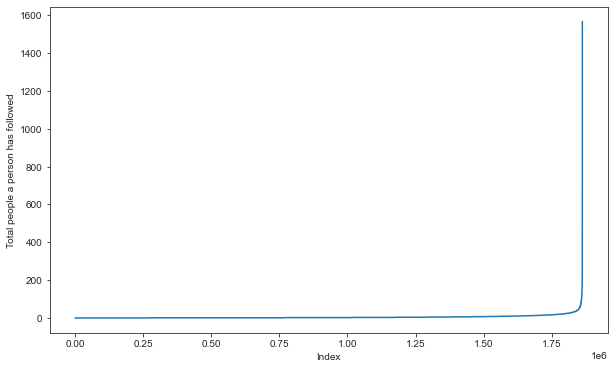

In [46]:
person_outdegree = list(dict(graph.out_degree()).values())
person_outdegree.sort()
plt.figure(figsize=(10,6))
plt.plot(person_outdegree)
plt.xlabel('Index')
plt.ylabel('Total people a person has followed')
plt.show()

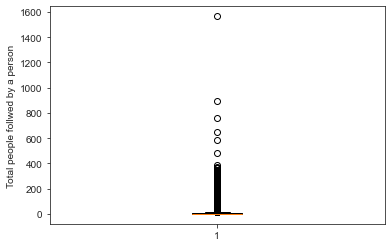

In [47]:
plt.boxplot(person_outdegree)
plt.ylabel('Total people follwed by a person')
plt.show()

In [48]:
### 90-100 percentile
for i in range(0,21):
    print(80+i,'percentile value is',np.percentile(person_outdegree,80+i))

80 percentile value is 7.0
81 percentile value is 7.0
82 percentile value is 8.0
83 percentile value is 8.0
84 percentile value is 9.0
85 percentile value is 9.0
86 percentile value is 10.0
87 percentile value is 10.0
88 percentile value is 11.0
89 percentile value is 12.0
90 percentile value is 12.0
91 percentile value is 13.0
92 percentile value is 14.0
93 percentile value is 15.0
94 percentile value is 17.0
95 percentile value is 19.0
96 percentile value is 21.0
97 percentile value is 24.0
98 percentile value is 29.0
99 percentile value is 40.0
100 percentile value is 1566.0


In [49]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(person_outdegree,99+(i/100)))

99.1 percentile value is 42.0
99.2 percentile value is 45.0
99.3 percentile value is 48.0
99.4 percentile value is 52.0
99.5 percentile value is 56.0
99.6 percentile value is 63.0
99.7 percentile value is 73.0
99.8 percentile value is 90.0
99.9 percentile value is 123.0
100.0 percentile value is 1566.0


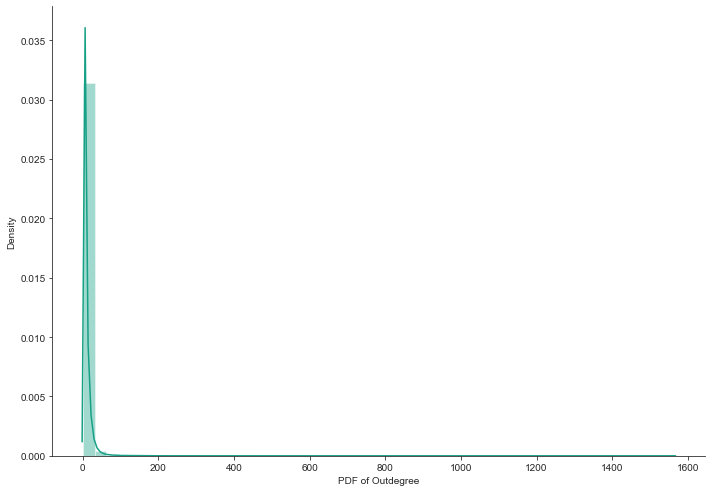

In [50]:
warnings.filterwarnings("ignore")
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(person_outdegree, color='#16A085')
plt.xlabel('PDF of Outdegree')
sns.despine()

##### Statistics of those who has no follwers or have not followed anyone

In [54]:
zero_followers = sum(np.array(person_indegree)==0)
zero_followed = sum(np.array(person_outdegree)==0)
print(zero_followers,', that are ',round((zero_followers*100)/len(person_indegree),2),' % have zero follwers')
print(zero_followed,', that are ',round((zero_followed*100)/len(person_outdegree),2),' % have followed zero people')

count=0
for i in graph.nodes():
    if len(list(graph.predecessors(i)))==0 :
        if len(list(graph.successors(i)))==0:
            count+=1
print(count, "people have no follwers and are not followed by anyone")

188043 , that are  10.1  % have zero follwers
274512 , that are  14.74  % have followed zero people
0 people have no follwers and are not followed by anyone


##### Statistics of both In and Out degree of data

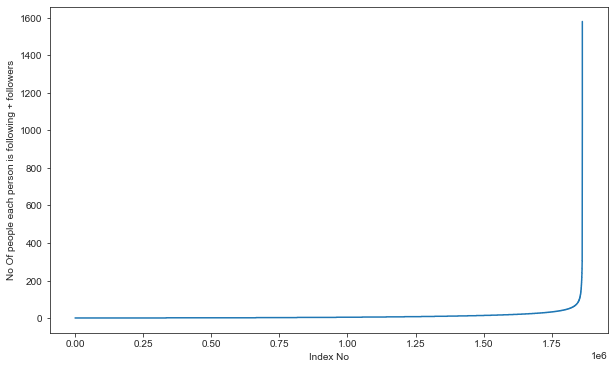

In [62]:
from collections import Counter
indegree = dict(graph.in_degree())
outdegree = dict(graph.out_degree())
total = Counter(indegree) + Counter(outdegree)
in_out_degree = np.array(list(total.values()))
in_out_degree_sort = sorted(in_out_degree)

plt.figure(figsize=(10,6))
plt.plot(in_out_degree_sort)
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')
plt.show()


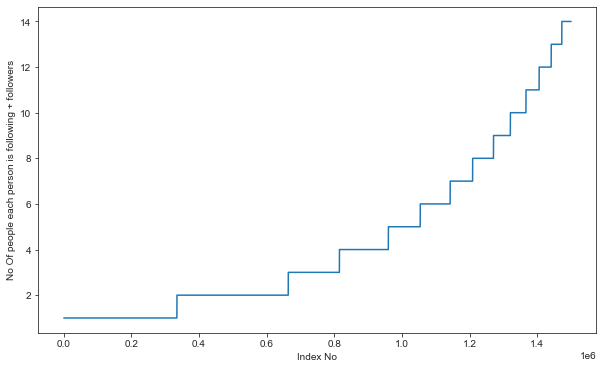

In [65]:
plt.figure(figsize=(10,6))
plt.plot(in_out_degree_sort[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')
plt.show()

In [68]:
#80-100 percentile
for i in range(0,21):
    print(80+i,'percentile value is',np.percentile(in_out_degree_sort,80+i))

80 percentile value is 14.0
81 percentile value is 15.0
82 percentile value is 16.0
83 percentile value is 16.0
84 percentile value is 17.0
85 percentile value is 18.0
86 percentile value is 19.0
87 percentile value is 20.0
88 percentile value is 21.0
89 percentile value is 23.0
90 percentile value is 24.0
91 percentile value is 26.0
92 percentile value is 28.0
93 percentile value is 31.0
94 percentile value is 33.0
95 percentile value is 37.0
96 percentile value is 41.0
97 percentile value is 48.0
98 percentile value is 58.0
99 percentile value is 79.0
100 percentile value is 1579.0


In [69]:
#99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(in_out_degree_sort,99+(i/100)))

99.1 percentile value is 83.0
99.2 percentile value is 87.0
99.3 percentile value is 93.0
99.4 percentile value is 99.0
99.5 percentile value is 108.0
99.6 percentile value is 120.0
99.7 percentile value is 138.0
99.8 percentile value is 168.0
99.9 percentile value is 221.0
100.0 percentile value is 1579.0


In [72]:
#print('Minimium ', in_out_degree.min(), 'people and Maximum',in_out_degree.max(), 'people having followers + following')
print("No of people having following & followers:")
print("Minimum: ",np.sum(in_out_degree==in_out_degree.min()),"\t Maximum: ",np.sum(in_out_degree==in_out_degree.max()),'\n')

print(np.sum(in_out_degree<10),' have less than 10 followers & following')
print(len(list(nx.weakly_connected_components(graph))),' are weakly connected components',)

count=0
for i in list(nx.weakly_connected_components(graph)):
    if len(i)==2:
        count+=1
print('weakly connected components wit 2 nodes',count)

No of people having following & followers:
Minimum:  334291 	 Maximum:  1 

1320326  have less than 10 followers & following
45558  are weakly connected components
weakly connected components wit 2 nodes 32195
